<a href="https://colab.research.google.com/github/DeVs2611/Flight_Price_Data_Analysis_using_Python/blob/main/Flight_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Overall Data Exploration

## 1.1) Data Loading

In [3]:
df = pd.read_excel('/content/Datasets/Flight Prices/flight_price.xlsx')

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## 1.2) Descibing the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## 1.3) Cheking Null values

In [7]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [8]:
df.dropna(subset = ['Route', 'Total_Stops'], inplace = True)

In [9]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# 2) Column Wise Analysis

### 2.1) Airline

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [12]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### 2.2 Date of Journey

In [13]:
df['Date_of_Journey']

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [14]:
df['day']= df['Date_of_Journey'].str.split('/').str[0].str.strip()

In [15]:
df['month']= df['Date_of_Journey'].str.split('/').str[1].str.strip()

In [16]:
df['year']= df['Date_of_Journey'].str.split('/').str[2].str.strip()

In [17]:
df[['day', 'month', 'year']]

,day,month,year
0,24,03,2019
1,1,05,2019
2,9,06,2019
3,12,05,2019
4,01,03,2019
...,...,...,...
10678,9,04,2019
10679,27,04,2019
10680,27,04,2019
10681,01,03,2019


In [18]:
df['day'].astype(int)

,day
0,24
1,1
2,9
3,12
4,1
...,...
10678,9
10679,27
10680,27
10681,1


In [19]:
df['month'].astype(int)

,month
0,3
1,5
2,6
3,5
4,3
...,...
10678,4
10679,4
10680,4
10681,3


In [20]:
df['year'].astype(int)

,year
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
10678,2019
10679,2019
10680,2019
10681,2019


In [21]:
day = []
month = []
year = []

for date_str in df['Date_of_Journey']:
    current_part = ""
    part_index = 0
    for char in date_str:
        if char == '/':
            if part_index == 0:
                day.append(int(current_part))
            elif part_index == 1:
                month.append(int(current_part))
            current_part = ""
            part_index += 1
        elif '0' <= char <= '9':  # Only include digits
            current_part += char
    # After the loop, the last part is the year
    year.append(int(current_part))
# df['day'] = day
# df['month'] = month
# df['year'] = year

In [22]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [23]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [24]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'year'],
      dtype='object')

In [25]:
del df['Route']

In [26]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'day', 'month', 'year'],
      dtype='object')

In [27]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [28]:
df['dep_hour']= df['Dep_Time'].str.split(':').str[0].str.strip()

In [29]:
df['dep_min']= df['Dep_Time'].str.split(':').str[1].str.strip()

In [30]:
df[['dep_hour','dep_min']]

,dep_hour,dep_min
0,22,20
1,05,50
2,09,25
3,18,05
4,16,50
...,...,...
10678,19,55
10679,20,45
10680,08,20
10681,11,30


In [31]:
df['arrival_hour']= df['Arrival_Time'].str.split(':').str[0].str.strip()

In [32]:
df['arrival_hour']

,arrival_hour
0,01
1,13
2,04
3,23
4,21
...,...
10678,22
10679,23
10680,11
10681,14


In [33]:
df['arrival_min']= df['Arrival_Time'].str.split(':').str[1].str.strip().str.split(' ').str[0].str.split().str[0]

In [34]:
df['arrival_min']

,arrival_min
0,10
1,15
2,25
3,30
4,35
...,...
10678,25
10679,20
10680,20
10681,10


In [35]:
df['arrival_hour'].astype(int)

,arrival_hour
0,1
1,13
2,4
3,23
4,21
...,...
10678,22
10679,23
10680,11
10681,14


In [36]:
df['arrival_min'].astype(int)

,arrival_min
0,10
1,15
2,25
3,30
4,35
...,...
10678,25
10679,20
10680,20
10681,10


In [37]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,04,2019,08,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10


In [38]:
df['duration_hour'] = df['Duration'].str.split(' ').str[0].str.replace('h', '').str.strip()

In [39]:
df['duration_hour']

,duration_hour
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [40]:
df['duration_min'] = df['Duration'].str.split(' ').str[1].str.replace('m', '').str.strip()

In [41]:
df[df['duration_hour'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min
6474,Air India,6/03/2019,Mumbai,Hyderabad,16:50,16:55,5m,2 stops,No info,17327,6,03,2019,16,50,16,55,5m,NaN


In [42]:
# Find the index of the row with '5m' in 'duration_hour'
index_to_correct = df[df['duration_hour'] == '5m'].index[0]

# Swap and clean the values for that row
df.loc[index_to_correct, 'duration_min'] = df.loc[index_to_correct, 'duration_hour'].replace('m', '').strip()
df.loc[index_to_correct, 'duration_hour'] = df.loc[index_to_correct, 'duration_min']
df.loc[index_to_correct, 'duration_min'] = 0 # Since it's 5m, the hour is 0

In [43]:
df['duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [44]:
df['duration_hour'] = df['duration_hour'].fillna(0)
df['duration_min'] = df['duration_min'].fillna(0)
df['duration_in_min'] = df['duration_hour'].astype(int) * 60 + df['duration_min'].astype(int)

In [45]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min,duration_in_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15,7,25,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25,04,25,19,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25,2,30,150
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20,2,35,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,04,2019,08,20,11,20,3,0,180
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10,2,40,160


In [46]:
del df['duration_hour']
del df['duration_min']
del df['Duration']

In [47]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day,month,year,dep_hour,dep_min,arrival_hour,arrival_min,duration_in_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,24,03,2019,22,20,01,10,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,1,05,2019,05,50,13,15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,9,06,2019,09,25,04,25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,12,05,2019,18,05,23,30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,01,03,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,non-stop,No info,4107,9,04,2019,19,55,22,25,150
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,non-stop,No info,4145,27,04,2019,20,45,23,20,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,non-stop,No info,7229,27,04,2019,08,20,11,20,180
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,non-stop,No info,12648,01,03,2019,11,30,14,10,160


In [48]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [49]:
del df['Additional_Info']

In [50]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,day,month,year,dep_hour,dep_min,arrival_hour,arrival_min,duration_in_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,24,03,2019,22,20,01,10,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662,1,05,2019,05,50,13,15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,9,06,2019,09,25,04,25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218,12,05,2019,18,05,23,30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302,01,03,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,non-stop,4107,9,04,2019,19,55,22,25,150
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,non-stop,4145,27,04,2019,20,45,23,20,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,non-stop,7229,27,04,2019,08,20,11,20,180
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,non-stop,12648,01,03,2019,11,30,14,10,160


# 3) Questions

In [51]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,day,month,year,dep_hour,dep_min,arrival_hour,arrival_min,duration_in_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,24,03,2019,22,20,01,10,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662,1,05,2019,05,50,13,15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,9,06,2019,09,25,04,25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218,12,05,2019,18,05,23,30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302,01,03,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,non-stop,4107,9,04,2019,19,55,22,25,150
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,non-stop,4145,27,04,2019,20,45,23,20,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,non-stop,7229,27,04,2019,08,20,11,20,180
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,non-stop,12648,01,03,2019,11,30,14,10,160


In [52]:
'''
KPI's
1) Average Ticket Price by Airline
2) Average Ticket Price by Route (Source → Destination)
3) Average Price by Number of Stops
4) Flight Volume by Airline
5) Flight Volume by Source Airport
6) Monthly Price Trend
7) Average Departure Hour by Airline
8)What are the busiest routes (most frequent source-destination pairs)?
9)How does the price vary depending on the time of day (departure hour)?
10)How does the price vary depending on the day of the week or month? (You have day and month, you could explore day of week as well if you convert the date to datetime objects)
11)Which airlines have the highest average duration for non-stop flights?
12)What is the average arrival hour by airline?
13)What is the average duration of flights by airline? (Using the calculated duration_in_min)
14)What is the average duration of flights by number of stops?

'''

"\nKPI's\n1) Average Ticket Price by Airline\n2) Average Ticket Price by Route (Source → Destination)\n3) Average Price by Number of Stops\n4) Flight Volume by Airline\n5) Flight Volume by Source Airport\n6) Monthly Price Trend\n7) Average Departure Hour by Airline\n8)What are the busiest routes (most frequent source-destination pairs)?\n9)How does the price vary depending on the time of day (departure hour)?\n10)How does the price vary depending on the day of the week or month? (You have day and month, you could explore day of week as well if you convert the date to datetime objects)\n11)Which airlines have the highest average duration for non-stop flights?\n12)What is the average arrival hour by airline?\n13)What is the average duration of flights by airline? (Using the calculated duration_in_min)\n14)What is the average duration of flights by number of stops?\n\n"

### 3.1) Average Ticket Price by Airline

In [53]:
df.groupby('Airline')['Price'].mean().sort_values(ascending = False)

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9612.427756
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


### 3.2) Average Ticket Price by Route (Source → Destination)

In [54]:
df.groupby(['Source', 'Destination'])['Price'].mean().sort_values(ascending=False)

,,Price
Source,Destination,
Banglore,New Delhi,11917.716738
Delhi,Cochin,10540.113536
Kolkata,Banglore,9158.389411
Banglore,Delhi,5143.918577
Mumbai,Hyderabad,5059.708752
Chennai,Kolkata,4789.892388


### 3.3) Average Price by Number of Stops

In [55]:
df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False)

,Price
Total_Stops,
4 stops,17686.000000
3 stops,13112.000000
2 stops,12715.807895
1 stop,10594.123556
non-stop,5024.900315


### 3.4) Flight Volume by Airline

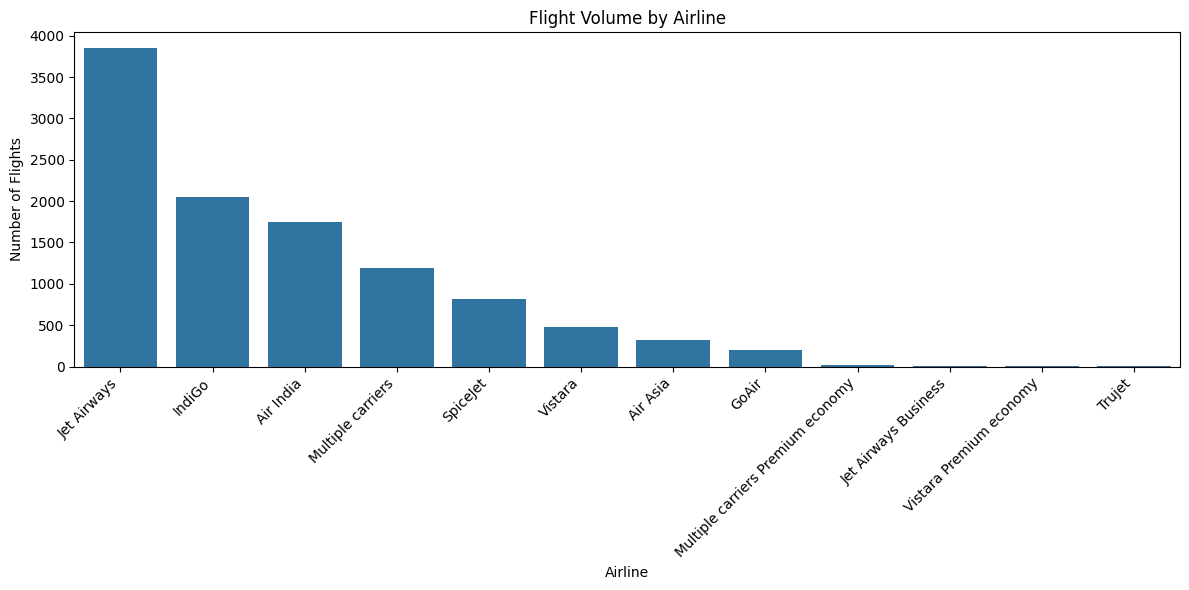

In [59]:
# Get the flight volume by airline
volume_by_airline = df.groupby('Airline')['Airline'].count().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.barplot(x=volume_by_airline.index, y=volume_by_airline.values)

plt.title('Flight Volume by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### 3.5 Flight Volume by Source Airport

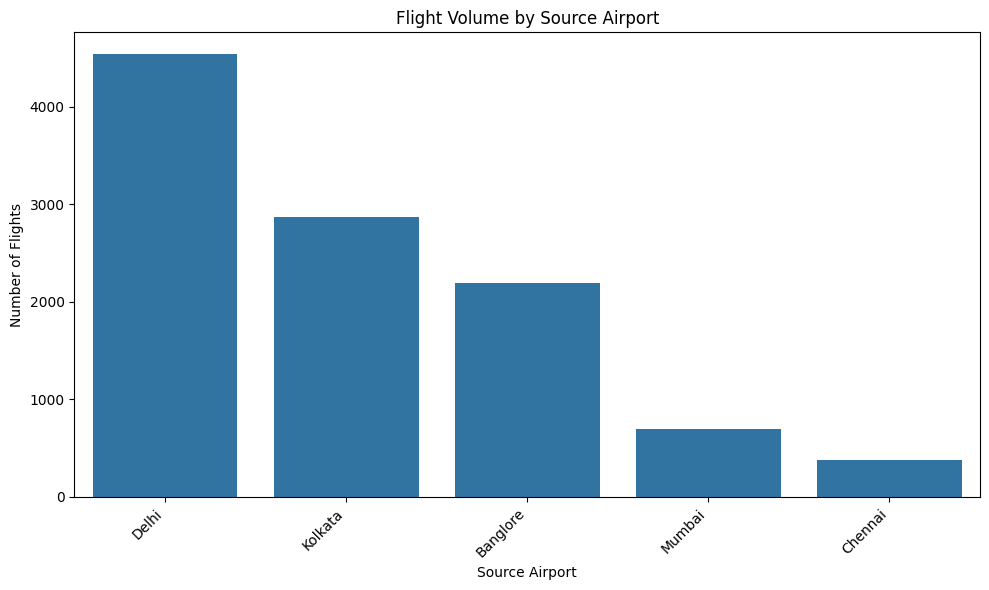

In [61]:
# Get the flight volume by source
volume_by_source = df.groupby('Source')['Airline'].count().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(x=volume_by_source.index, y=volume_by_source.values)

plt.title('Flight Volume by Source Airport')
plt.xlabel('Source Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### 3.6) Monthly Price Trend

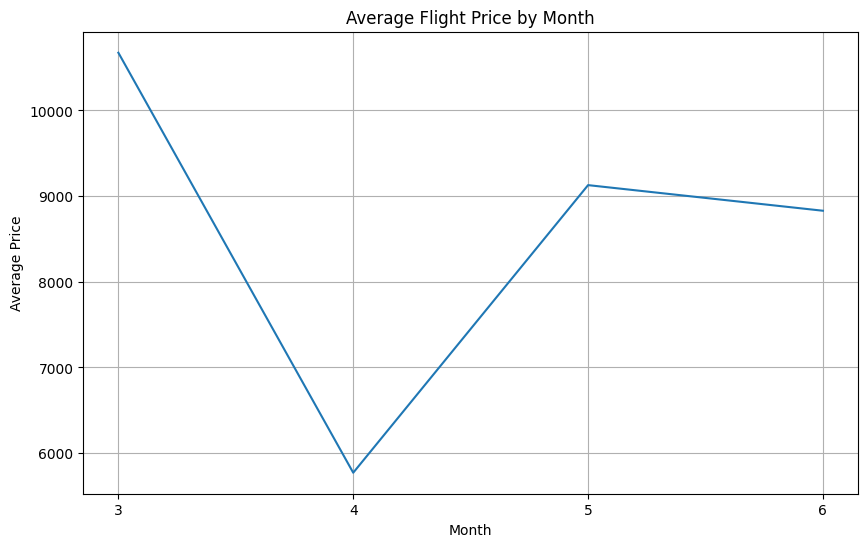

In [62]:
df['month'] = df['month'].astype(int)
average_price_by_month = df.groupby('month')['Price'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_month.index, y=average_price_by_month.values)

plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(average_price_by_month.index) # Ensure all months are shown as ticks
plt.grid(True) # Add a grid for better readability
plt.show()

### 3.7) Average Departure Hour by Airline

In [63]:
df['dep_hour'] = df['dep_hour'].astype(int)

In [64]:
df.groupby('Airline')['dep_hour'].mean().sort_values(ascending=False)

,dep_hour
Airline,
Air Asia,13.996865
Jet Airways,13.363731
Vistara,13.125261
Trujet,13.000000
Air India,12.323815
SpiceJet,12.282396
IndiGo,12.215295
GoAir,11.798969
Vistara Premium economy,11.333333


### 3.8) What are the busiest routes (most frequent source-destination pairs)?

In [65]:
df.groupby(['Source', 'Destination'])['Airline'].count().sort_values(ascending=False)

Source    Destination
Delhi     Cochin         4536
Kolkata   Banglore       2871
Banglore  Delhi          1265
          New Delhi       932
Mumbai    Hyderabad       697
Chennai   Kolkata         381
Name: Airline, dtype: int64

### 3.9) How does the price vary depending on the time of day (departure hour)?

In [66]:
df.groupby('dep_hour')['Price'].mean()

,Price
dep_hour,
0,7615.075000
1,4354.621622
2,8419.974227
3,10474.625000
4,7251.876471
5,9681.992051
6,8314.480349
7,8496.111880
8,10083.322812


### 3.10) How does the price vary depending on the day of the week or month? (You have day and month, you could explore day of week as well if you convert the date to datetime objects)

In [67]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)

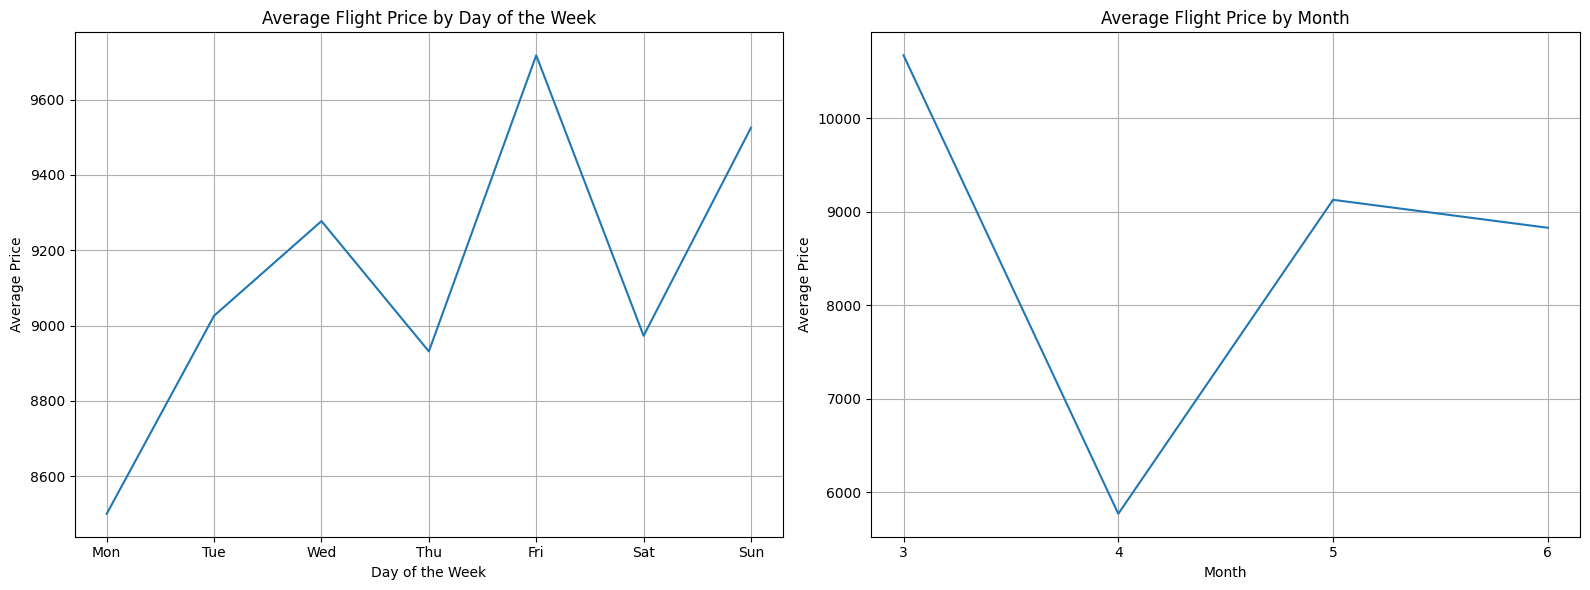

In [68]:
df['day_of_week'] = df['Date_of_Journey'].dt.dayofweek
average_price_by_dayofweek = df.groupby('day_of_week')['Price'].mean()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

# Plot Average Price by Day of the Week
sns.lineplot(ax=axes[0], x=average_price_by_dayofweek.index, y=average_price_by_dayofweek.values)
axes[0].set_title('Average Flight Price by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Price')
axes[0].set_xticks(average_price_by_dayofweek.index)
axes[0].grid(True)
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Set meaningful labels for days

# Plot Average Price by Month
sns.lineplot(ax=axes[1], x=average_price_by_month.index, y=average_price_by_month.values)
axes[1].set_title('Average Flight Price by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Price')
axes[1].set_xticks(average_price_by_month.index)
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### 3.11) Which airlines have the highest average duration for non-stop flights?

In [69]:
df[df['Total_Stops']=='non-stop'].groupby('Airline')['duration_in_min'].mean().nlargest(1)

,duration_in_min
Airline,
GoAir,170.652174


# 4) Machine Learning Models

**Reasoning**:
Map the 'Total_Stops' column to numerical values (non-stop=0, 1 stop=1, etc.) and convert its data type to integer as per the first instruction.



In [70]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(int)

/tmp/ipython-input-1856444211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(int)


In [71]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).infer_objects(copy=False).astype(int)
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
categorical_cols = ['Airline', 'Source', 'Destination']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
X = df.drop('Price', axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X = df.drop('Price', axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implement Baseline Model

### Subtask:
Create a baseline model by predicting the mean of the training prices. Evaluate this model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). Clearly label these metrics as 'baseline benchmark'.


In [74]:
baseline_prediction = y_train.mean()
baseline_predictions_test = np.full_like(y_test, baseline_prediction)

from sklearn.metrics import mean_absolute_error, mean_squared_error

baseline_mae = mean_absolute_error(y_test, baseline_predictions_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions_test))

print(f"Baseline MAE: {baseline_mae:.2f}")
print(f"Baseline RMSE: {baseline_rmse:.2f}")

Baseline MAE: 3676.40
Baseline RMSE: 4643.71


## Implement Linear Regression

### Subtask:
Train a `LinearRegression` model. Evaluate its performance using MAE, RMSE, and R². Generate a scatter plot of actual vs. predicted values and a plot of residuals vs. predicted values.


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Instantiate a LinearRegression model
linear_reg_model = LinearRegression()

# 2. Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_lr = linear_reg_model.predict(X_test)

# 4. Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# 5. Print the calculated metrics
print("Linear Regression Model Performance:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

Linear Regression Model Performance:
MAE: 1975.10
RMSE: 2854.20
R-squared: 0.62


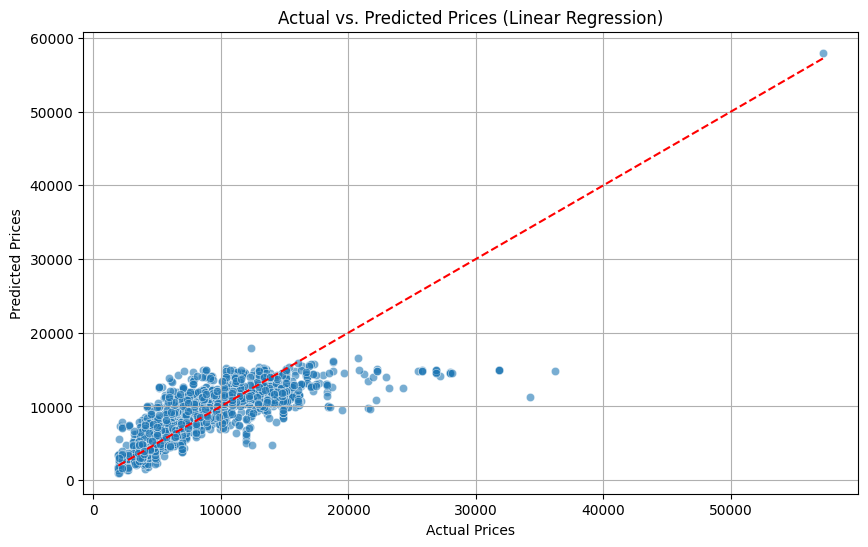

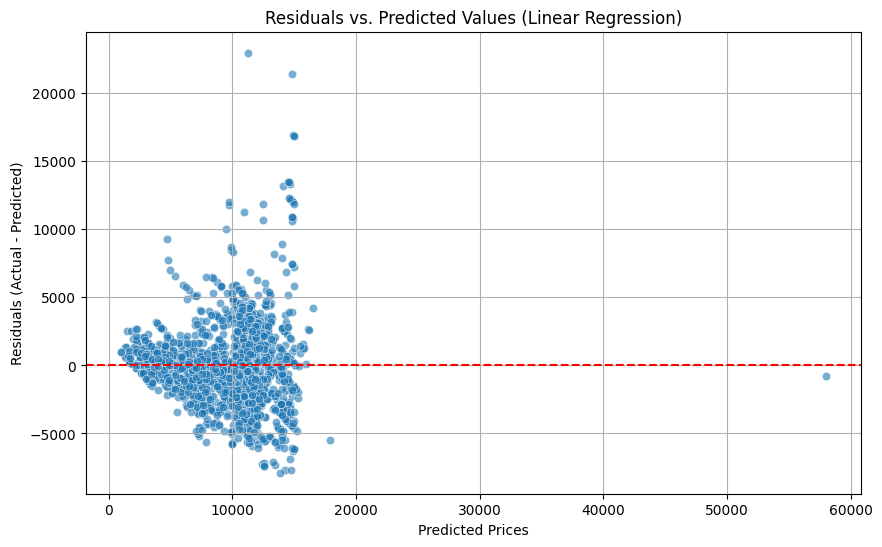

In [76]:
# Calculate residuals
residuals = y_test - y_pred_lr

# 7. Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Ideal prediction line
plt.grid(True)
plt.show()

# 8. Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--') # Horizontal line at y=0
plt.title('Residuals vs. Predicted Values (Linear Regression)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

## Implement Decision Tree Regressor

### Subtask:
Train a `DecisionTreeRegressor` model, tuning `max_depth` across values like 5, 10, and 15, while keeping `min_samples_leaf` at 5. Select the best `max_depth` based on validation RMSE. Evaluate the best model using MAE, RMSE, and R². Generate a bar chart showing feature importances.


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize a dictionary to store RMSE scores for different max_depth values
rmse_scores = {}

# Iterate through max_depth values of 5, 10, and 15
for max_depth_val in [5, 10, 15]:
    # Instantiate a DecisionTreeRegressor with the current max_depth and min_samples_leaf=5
    dt_regressor = DecisionTreeRegressor(max_depth=max_depth_val, min_samples_leaf=5, random_state=42)

    # Fit the model to the training data
    dt_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_dt = dt_regressor.predict(X_test)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

    # Store the RMSE along with the max_depth value
    rmse_scores[max_depth_val] = rmse_dt

print("RMSE scores for different max_depth values:")
for depth, rmse in rmse_scores.items():
    print(f"max_depth = {depth}: RMSE = {rmse:.2f}")

RMSE scores for different max_depth values:
max_depth = 5: RMSE = 2626.11
max_depth = 10: RMSE = 2259.01
max_depth = 15: RMSE = 2233.49


Best max_depth based on RMSE: 15

Best Decision Tree Regressor Model Performance:
MAE: 1217.21
RMSE: 2233.49
R-squared: 0.77


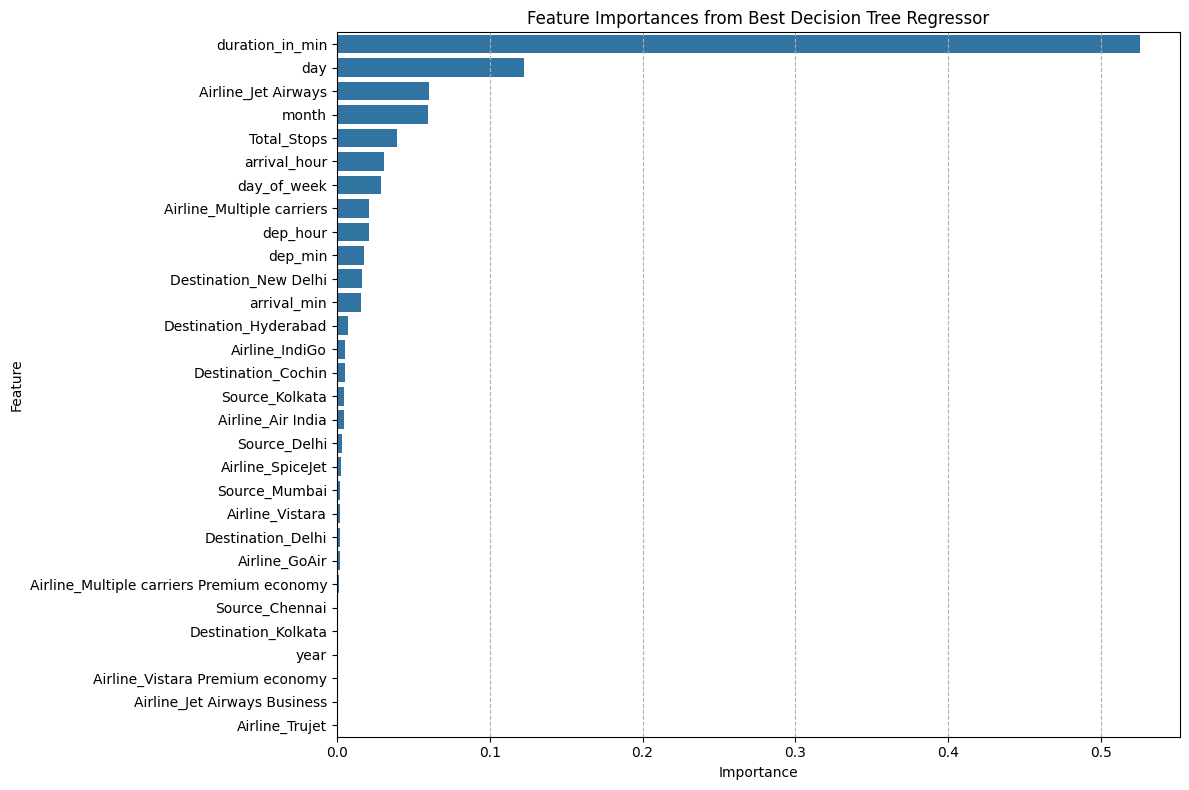

In [79]:
from sklearn.metrics import mean_absolute_error, r2_score

# 4. Identify the max_depth value that yielded the lowest RMSE
best_max_depth = min(rmse_scores, key=rmse_scores.get)
print(f"Best max_depth based on RMSE: {best_max_depth}")

# 5. Instantiate a new DecisionTreeRegressor with the best max_depth
best_dt_regressor = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=5, random_state=42)

# 6. Fit this best model to the training data
best_dt_regressor.fit(X_train, y_train)

# 7. Make predictions on the test set using the best model
y_pred_best_dt = best_dt_regressor.predict(X_test)

# 8. Calculate and print the evaluation metrics for the best model
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mean_squared_error(y_test, y_pred_best_dt))
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print("\nBest Decision Tree Regressor Model Performance:")
print(f"MAE: {mae_best_dt:.2f}")
print(f"RMSE: {rmse_best_dt:.2f}")
print(f"R-squared: {r2_best_dt:.2f}")

# 9. Extract feature importances
feature_importances = best_dt_regressor.feature_importances_
feature_names = X.columns

# Create a pandas Series for easier plotting
importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# 10. Create a bar chart of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_series.values, y=importance_series.index)
plt.title('Feature Importances from Best Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## Implement Random Forest Regressor

### Subtask:
Train a `RandomForestRegressor` with `n_estimators=200`, `max_depth=20`, `min_samples_leaf=5`, `n_jobs=-1`, and `random_state=42`. Evaluate its performance using MAE, RMSE, and R². Generate a bar chart showing feature importances.


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Instantiate a RandomForestRegressor object
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=5, n_jobs=-1, random_state=42)

# 2. Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# 4. Calculate and print evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Model Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Random Forest Regressor Model Performance:
MAE: 1154.24
RMSE: 1975.17
R-squared: 0.82


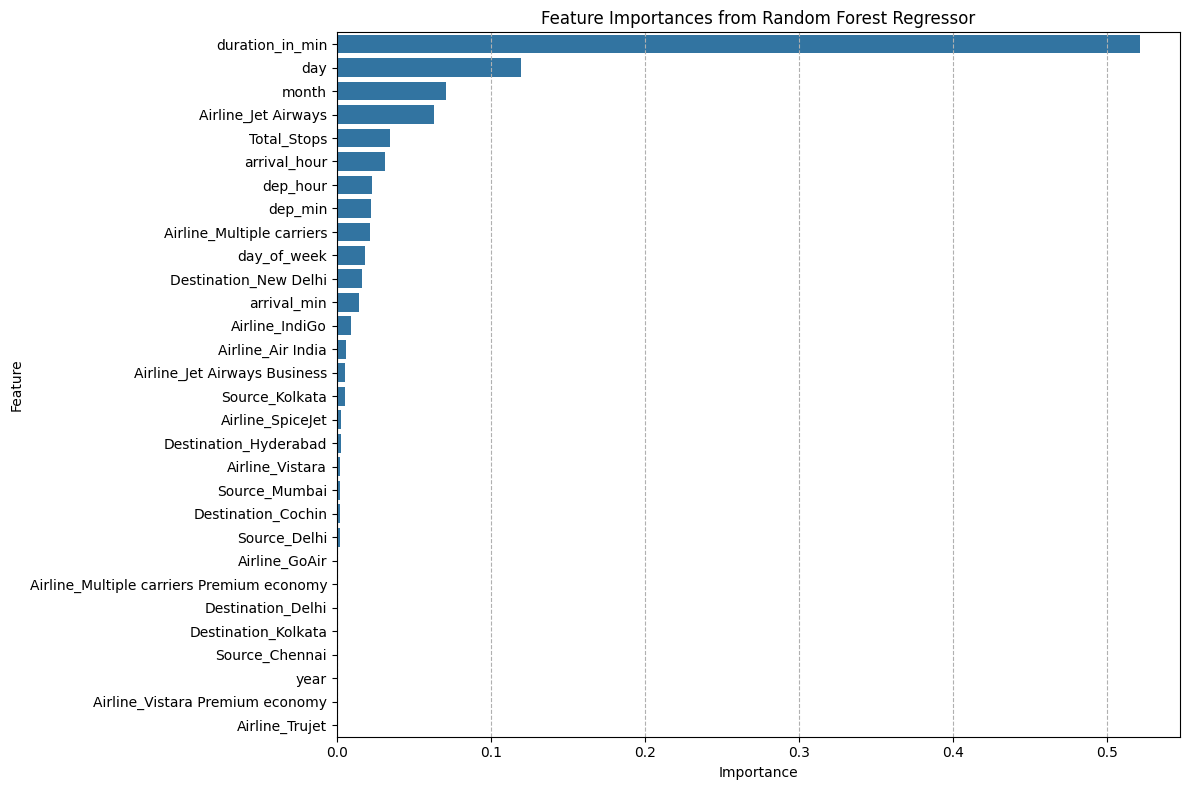

In [81]:
# 6. Extract feature importances
feature_importances_rf = rf_regressor.feature_importances_
feature_names_rf = X.columns

# 7. Create a pandas Series for easier plotting and sort them
importance_series_rf = pd.Series(feature_importances_rf, index=feature_names_rf).sort_values(ascending=False)

# 8. Generate a bar chart of the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_series_rf.values, y=importance_series_rf.index)
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## Implement Gradient Boosting Regressor (Optional)

### Subtask:
Train a `GradientBoostingRegressor` with `n_estimators=300`, `learning_rate=0.05`, `max_depth=4`, and `subsample=0.8`. Evaluate its performance using MAE, RMSE, and R².


In [82]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Instantiate a GradientBoostingRegressor object
gbr_regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42)

# 2. Fit the model to the training data
gbr_regressor.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_gbr = gbr_regressor.predict(X_test)

# 4. Calculate evaluation metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# 5. Print the calculated metrics
print("Gradient Boosting Regressor Model Performance:")
print(f"MAE: {mae_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R-squared: {r2_gbr:.2f}")

Gradient Boosting Regressor Model Performance:
MAE: 1334.61
RMSE: 1906.70
R-squared: 0.83


## Perform Cross-Validation

### Subtask:
Apply 5-fold cross-validation to the Linear Regression, Decision Tree, and Random Forest models. Report the mean RMSE for each of these models.


In [83]:
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("KFold object created for 5-fold cross-validation.")

KFold object created for 5-fold cross-validation.


**Reasoning**:
Now that the KFold object is initialized, I will calculate the cross-validation RMSE for the Linear Regression model using `cross_val_score` and then compute and print the mean RMSE.



In [84]:
cv_rmse_lr = -cross_val_score(linear_reg_model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_cv_rmse_lr = np.mean(cv_rmse_lr)
print(f"Linear Regression - Mean Cross-Validation RMSE: {mean_cv_rmse_lr:.2f}")

Linear Regression - Mean Cross-Validation RMSE: 2828.05


**Reasoning**:
Following the subtask instructions, I will now calculate the cross-validation RMSE for the best Decision Tree Regressor model (`best_dt_regressor`) and print its mean RMSE.



In [85]:
cv_rmse_dt = -cross_val_score(best_dt_regressor, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_cv_rmse_dt = np.mean(cv_rmse_dt)
print(f"Decision Tree Regressor - Mean Cross-Validation RMSE: {mean_cv_rmse_dt:.2f}")

Decision Tree Regressor - Mean Cross-Validation RMSE: 2280.10


**Reasoning**:
To complete the cross-validation subtask, I will now calculate the cross-validation RMSE for the Random Forest Regressor model (`rf_regressor`) and print its mean RMSE, as specified in the instructions.



In [86]:
cv_rmse_rf = -cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_cv_rmse_rf = np.mean(cv_rmse_rf)
print(f"Random Forest Regressor - Mean Cross-Validation RMSE: {mean_cv_rmse_rf:.2f}")

Random Forest Regressor - Mean Cross-Validation RMSE: 2055.28


## Compare Models and Visualize Results

### Subtask:
Create a comparison table summarizing MAE, RMSE, and R² for all implemented models. Generate bar charts to visually compare RMSE, MAE, and R² across models. Finally, create an 'Actual vs Predicted' comparison plot for the model that performs best (e.g., lowest RMSE). Ensure all plots include legends.


In [87]:
# Create a dictionary to store the metrics for each model
model_metrics = {
    'Baseline': {
        'MAE': baseline_mae,
        'RMSE': baseline_rmse,
        'R-squared': np.nan, # Baseline does not have R-squared in this context
        'Mean CV RMSE': np.nan # No CV for baseline
    },
    'Linear Regression': {
        'MAE': mae_lr,
        'RMSE': rmse_lr,
        'R-squared': r2_lr,
        'Mean CV RMSE': mean_cv_rmse_lr
    },
    'Decision Tree': {
        'MAE': mae_best_dt,
        'RMSE': rmse_best_dt,
        'R-squared': r2_best_dt,
        'Mean CV RMSE': mean_cv_rmse_dt
    },
    'Random Forest': {
        'MAE': mae_rf,
        'RMSE': rmse_rf,
        'R-squared': r2_rf,
        'Mean CV RMSE': mean_cv_rmse_rf
    },
    'Gradient Boosting': {
        'MAE': mae_gbr,
        'RMSE': rmse_gbr,
        'R-squared': r2_gbr,
        'Mean CV RMSE': np.nan # CV for GBR not calculated in previous steps
    }
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(model_metrics).T

# Print the comparison DataFrame
print("\nModel Performance Comparison:")
print(comparison_df.round(2))



Model Performance Comparison:
                       MAE     RMSE  R-squared  Mean CV RMSE
Baseline           3676.40  4643.71        NaN           NaN
Linear Regression  1975.10  2854.20       0.62       2828.05
Decision Tree      1217.21  2233.49       0.77       2280.10
Random Forest      1154.24  1975.17       0.82       2055.28
Gradient Boosting  1334.61  1906.70       0.83           NaN


**Reasoning**:
Now that the comparison table is generated, I will create three separate bar plots to visually compare the MAE, RMSE, and R-squared metrics across all implemented models, as specified in the instructions. This will provide a clear visual representation of each model's performance on different metrics.



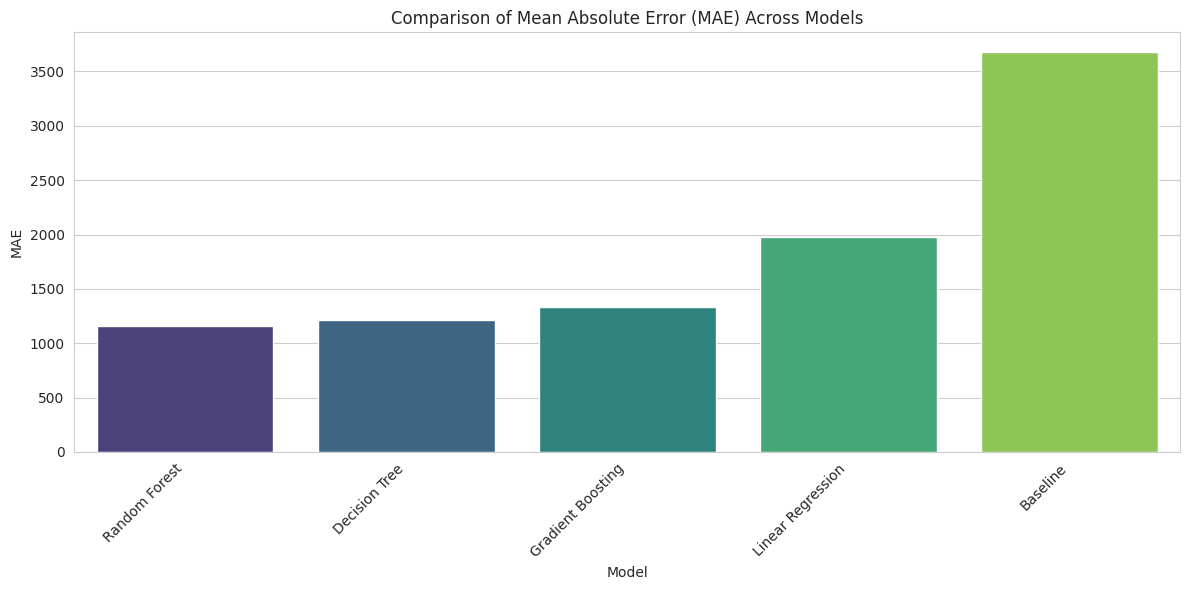

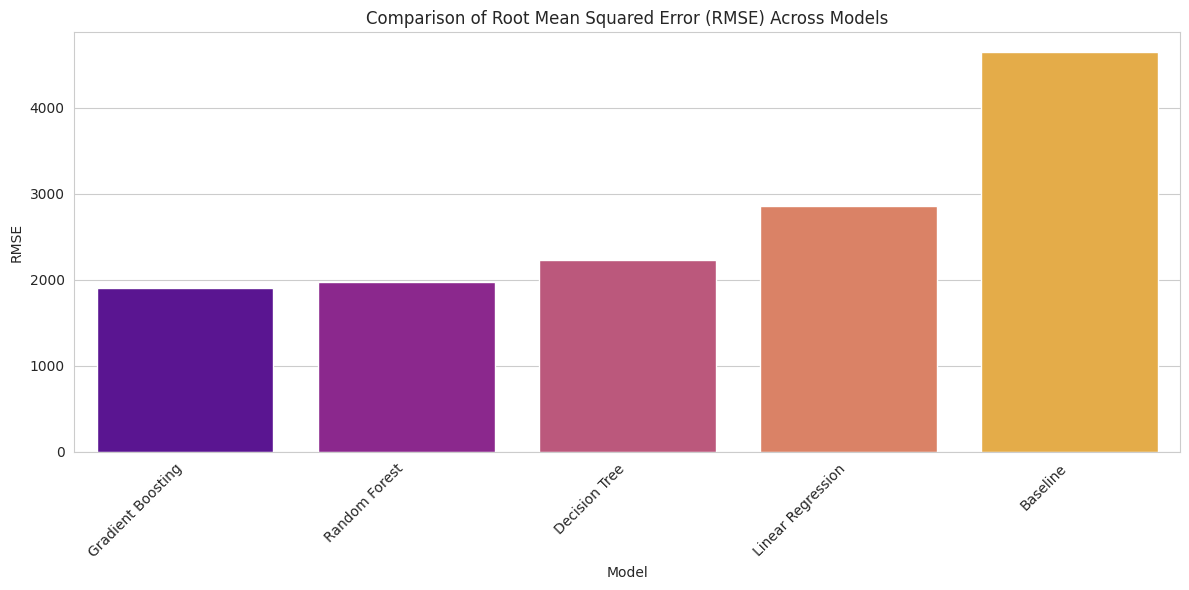

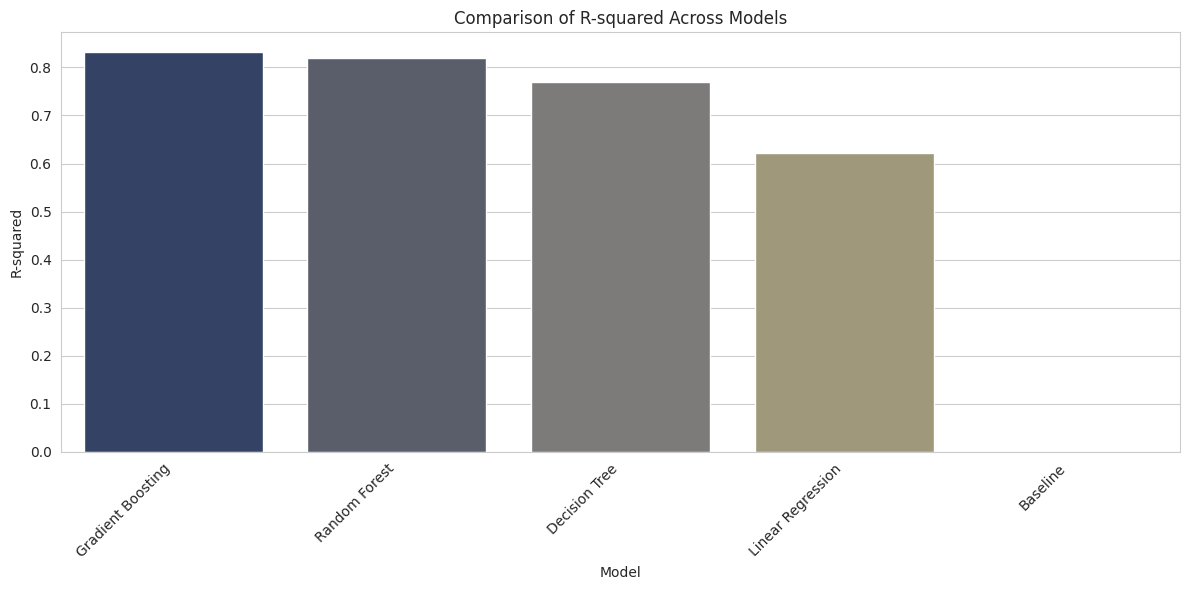

In [90]:
# Set up plot styles
sns.set_style('whitegrid')


plt.figure(figsize=(12, 6))
sns.barplot(x=comparison_df.sort_values(by='MAE', ascending=True).index, y=comparison_df.sort_values(by='MAE', ascending=True)['MAE'], hue=comparison_df.sort_values(by='MAE', ascending=True).index, palette='viridis', legend=False)
plt.title('Comparison of Mean Absolute Error (MAE) Across Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x=comparison_df.sort_values(by='RMSE', ascending=True).index, y=comparison_df.sort_values(by='RMSE', ascending=True)['RMSE'], hue=comparison_df.sort_values(by='RMSE', ascending=True).index, palette='plasma', legend=False)
plt.title('Comparison of Root Mean Squared Error (RMSE) Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=comparison_df.sort_values(by='R-squared', ascending=False).index, y=comparison_df.sort_values(by='R-squared', ascending=False)['R-squared'], hue=comparison_df.sort_values(by='R-squared', ascending=False).index, palette='cividis', legend=False)
plt.title('Comparison of R-squared Across Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Now that the bar plots for MAE, RMSE, and R-squared have been generated, I will identify the model with the lowest RMSE from the `comparison_df` and then create an 'Actual vs Predicted' scatter plot for this best-performing model, as specified in the instructions.




Model with the lowest RMSE: Gradient Boosting (RMSE: 1906.70)


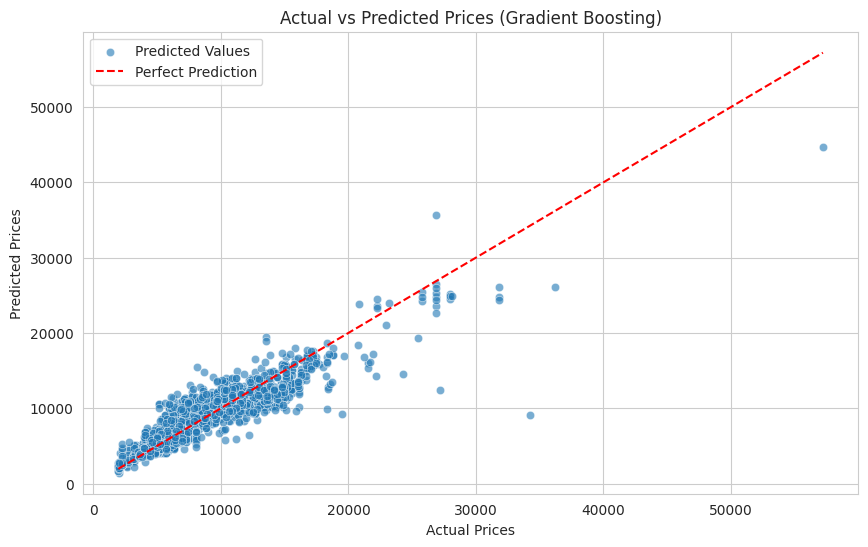

In [92]:
# 4. Identify the model with the lowest RMSE
# Exclude models with NaN RMSE (like Baseline and Gradient Boosting if CV not done for them)
lowest_rmse_model_name = comparison_df.dropna(subset=['RMSE'])['RMSE'].idxmin()
lowest_rmse_value = comparison_df.dropna(subset=['RMSE'])['RMSE'].min()

print(f"\nModel with the lowest RMSE: {lowest_rmse_model_name} (RMSE: {lowest_rmse_value:.2f})")

# Get the predictions for the best model
if lowest_rmse_model_name == 'Linear Regression':
    y_pred_best = y_pred_lr
elif lowest_rmse_model_name == 'Decision Tree':
    y_pred_best = y_pred_best_dt
elif lowest_rmse_model_name == 'Random Forest':
    y_pred_best = y_pred_rf
elif lowest_rmse_model_name == 'Gradient Boosting':
    y_pred_best = y_pred_gbr
else:
    y_pred_best = None # Should not happen if data is consistent

if y_pred_best is not None:
    # 5. Generate an 'Actual vs Predicted' scatter plot for the best-performing model
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, label='Predicted Values')
    plt.title(f'Actual vs Predicted Prices ({lowest_rmse_model_name})')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction') # Ideal prediction line
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Predictions for {lowest_rmse_model_name} not found for plotting.")